In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


#Loading csv
df = pd.read_csv("data.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [60]:
#pre processing
df_clean = df.drop(columns=["index", "Patient Id"])
df_clean["Level_binary"] = df_clean["Level"].apply(lambda x: 1 if x == "High" else 0)

X = df_clean.drop(columns=["Level", "Level_binary", "Air Pollution", "Dust Allergy"])
y = df_clean["Level_binary"]




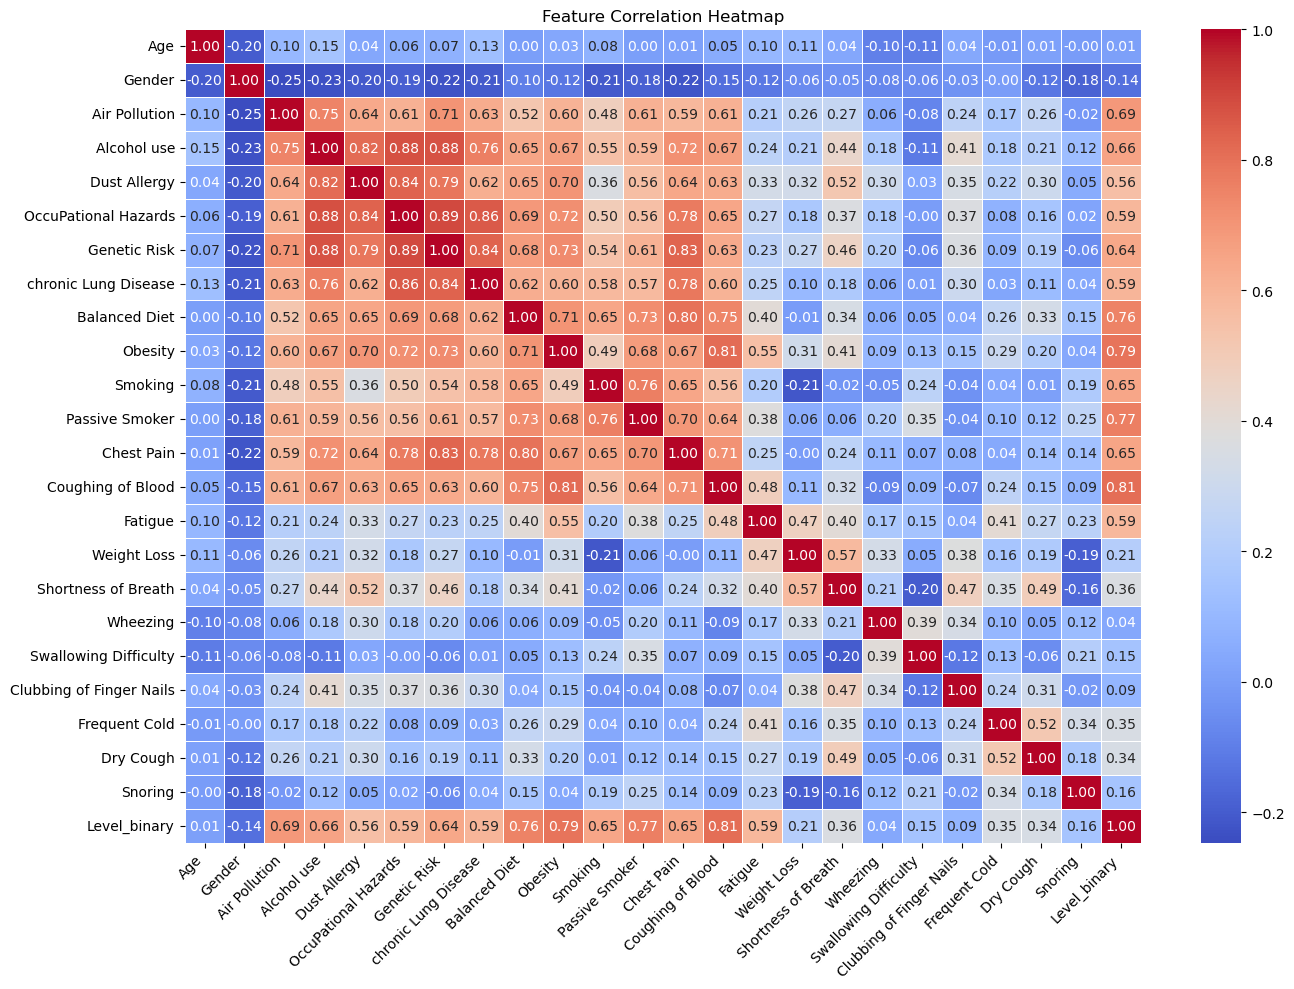

In [62]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

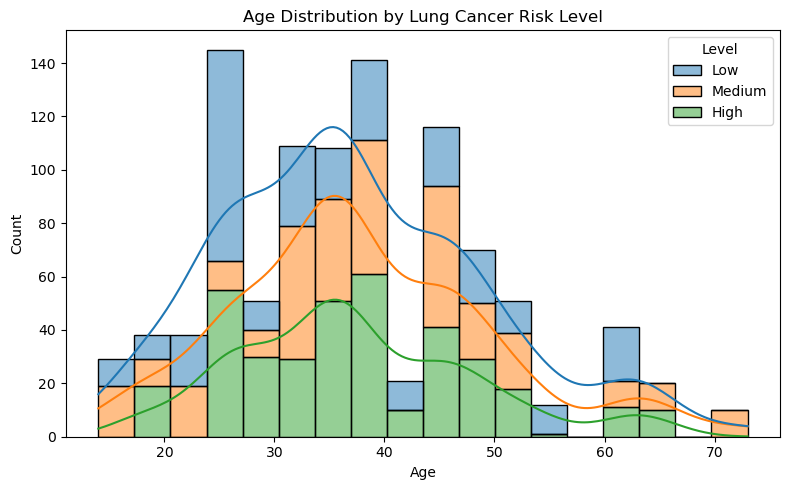

In [64]:
# Add original "Level" back for visualization
df_viz = df_clean.copy()
df_viz["Level"] = df["Level"]

plt.figure(figsize=(8, 5))
sns.histplot(data=df_viz, x="Age", hue="Level", multiple="stack", kde=True)
plt.title("Age Distribution by Lung Cancer Risk Level")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

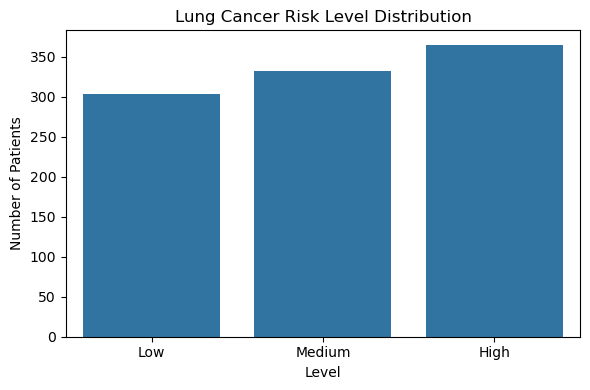

In [66]:
# Count Plot of Risk Levels
plt.figure(figsize=(6, 4))
sns.countplot(x="Level", data=df)
plt.title("Lung Cancer Risk Level Distribution")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

In [68]:
X_small = X.sample(frac=0.3, random_state=42)
y_small = y[X_small.index]

# 3. Train/test split on reduced data
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

In [78]:
#Model initialization
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=3)
knn_model = KNeighborsClassifier(n_neighbors=7)

In [80]:
#Training
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [82]:
#Prediction
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [84]:
#Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Report:\n", classification_report(y_test, y_pred_log))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Report:\n", classification_report(y_test, y_pred_rf))

print("\n=== K-Nearest Neighbors ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Report:\n", classification_report(y_test, y_pred_knn))


=== Logistic Regression ===
Accuracy: 1.0
Confusion Matrix:
 [[36  0]
 [ 0 24]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        24

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


=== Random Forest ===
Accuracy: 1.0
Confusion Matrix:
 [[36  0]
 [ 0 24]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        24

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


=== K-Nearest Neighbors ===
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[34  2]
 [ 0 24]]
Report:
               precision    recall  f1-score   support

           0 

In [88]:
# 7. Saving models
pickle.dump(log_model, open("logistic_regression_reduced.sav", "wb"))
pickle.dump(rf_model, open("random_forest_reduced.sav", "wb"))
pickle.dump(knn_model, open("knn.sav", "wb"))